# Deep Hedging AI: Comparison to Black & Scholes

In this notebook we run Deep Hedging in a Black & Scholes world. In this case we can compare hedging a vanilla call vs its perfect hedge.

### Proof that Deep Hedging should converge to the Black & Scholes price

We are using the notation from the mark down file https://github.com/hansbuehler/deephedging.
Let $Z_T$ be the claim in $T$. Assume that there are no trading cost and that the market is _complete_. This applies to Black & Scholes, and also to most other models typically used in quant finance.
In the limit of $dt\downarrow 0$ that menas there is a perfect replication strateg $\alpha^*$ such that
$$
    (*) \ \ \ \ Z_T \equiv z_0 + \sum_{t=0}^{T-1} \alpha_t^*(s_t)\ ( H_T - H_t)
$$
The constant $z_0$ is the risk-neutral price of $Z_T$.

Consider now our risk-adjusted return metric $U$ as used in Deep Hedging. We are trying to compute
$$
    \sup_a:\ U\left[\ Z_T + \sum_{t=0}^{T-1} a_t(s_t)\ ( H_T - H_t)\ \right]
$$
We now insert $(*)$ for $Z_T$. That gives
$$
    \sup_a:\ U\left[\ z_0 + \sum_{t=0}^{T-1} \alpha_t^*(s_t)\ ( H_T - H_t) + \sum_{t=0}^{T-1} a_t(s_t)\ ( H_T - H_t)\ \right]
$$
Because of _cash-invariance_ we can move $z_0$ out of $U$.
$$
(**) \ \ \ \    z_0 + \sup_a:\ U\left[\ \sum_{t=0}^{T-1} \left( \alpha_t^*(s_t) - a_t(s_t) \right)\ ( H_T - H_t) \ \right]
$$
In case that the underlying path generator is a risk-neutral measure we get $\mathrm{E}_t[ H_T - H_t ] = 0$ and therefore that $\mathrm{E}_t[ x_t(a_t) ( H_T - H_t)  ]=0$ for any possible strategy $x$.
Moreover, because $U$ has the property that $U(X) \leq E[X]$ we see that an optimal solutio for $(**)$ is achived in
$$
    a_t = -\alpha^*_t
$$
which means that the optimal solution to the Deep Hedging problem for _any_ monetary utility is the risk-neutral strategy.
We also note that the utility of $Z_T$ under the Deep Hedging is
$
z_0 + U(0) = z_0 
$
in other words it returns the risk-neutral price as well.

In [1]:
!pip -q install cdxbasics "tensorflow==2.10" "tensorflow_probability==0.14"
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

SageMaker: added python path /home/ec2-user/SageMaker


In [2]:
print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world_bs import SimpleWorld_BS

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20       # 20 weekly steps
config.world.dt = 1./250.*5.  # """
config.world.drift = 0.
config.world.cost = 0.
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.optimizer.name = "adam"
config.trainer.train.optimizer.learning_rate = 0.001
config.trainer.train.optimizer.clipvalue = 0.5
config.trainer.train.optimizer.global_clipnorm = 1.
config.trainer.train.batch_size = 2000
config.trainer.train.epochs = 400
config.trainer.caching.mode = "on"
config.trainer.visual.epoch_refresh = 2
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

config_small_dt = config.copy()
config_small_dt.world.steps = 20*5  # 100 daily steps
config_small_dt.world.dt = 1./250.  # """

Deep Hedging AI says hello  ... 

2023-01-19 23:50:31.443019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 23:50:31.616015: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version 2.10.0 running on 1 CPUs and 0 GPUs


2023-01-19 23:50:33.609886: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-19 23:50:33.609932: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-12-144.eu-west-2.compute.internal): /proc/driver/nvidia/version does not exist


## Deep Hedging in a Black \& Scholes World - Big Steps

2023-01-19 23:50:34.522550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Gym with 943 trainable weights compiled and initialized. Took 2s
Network feature information:
 Features used by the agent:        delta, price and time_left
 Features available to the agent:   action, cost, delta, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by the utility:      -
 Features available to the utility: cost, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
Caching enabled @ '/home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/afb6002dd5bc9cf5bc45d91a55b9ca2c.pck'
Cache successfully loaded. Current epoch: 9
Training monitor initialized. Took 0s



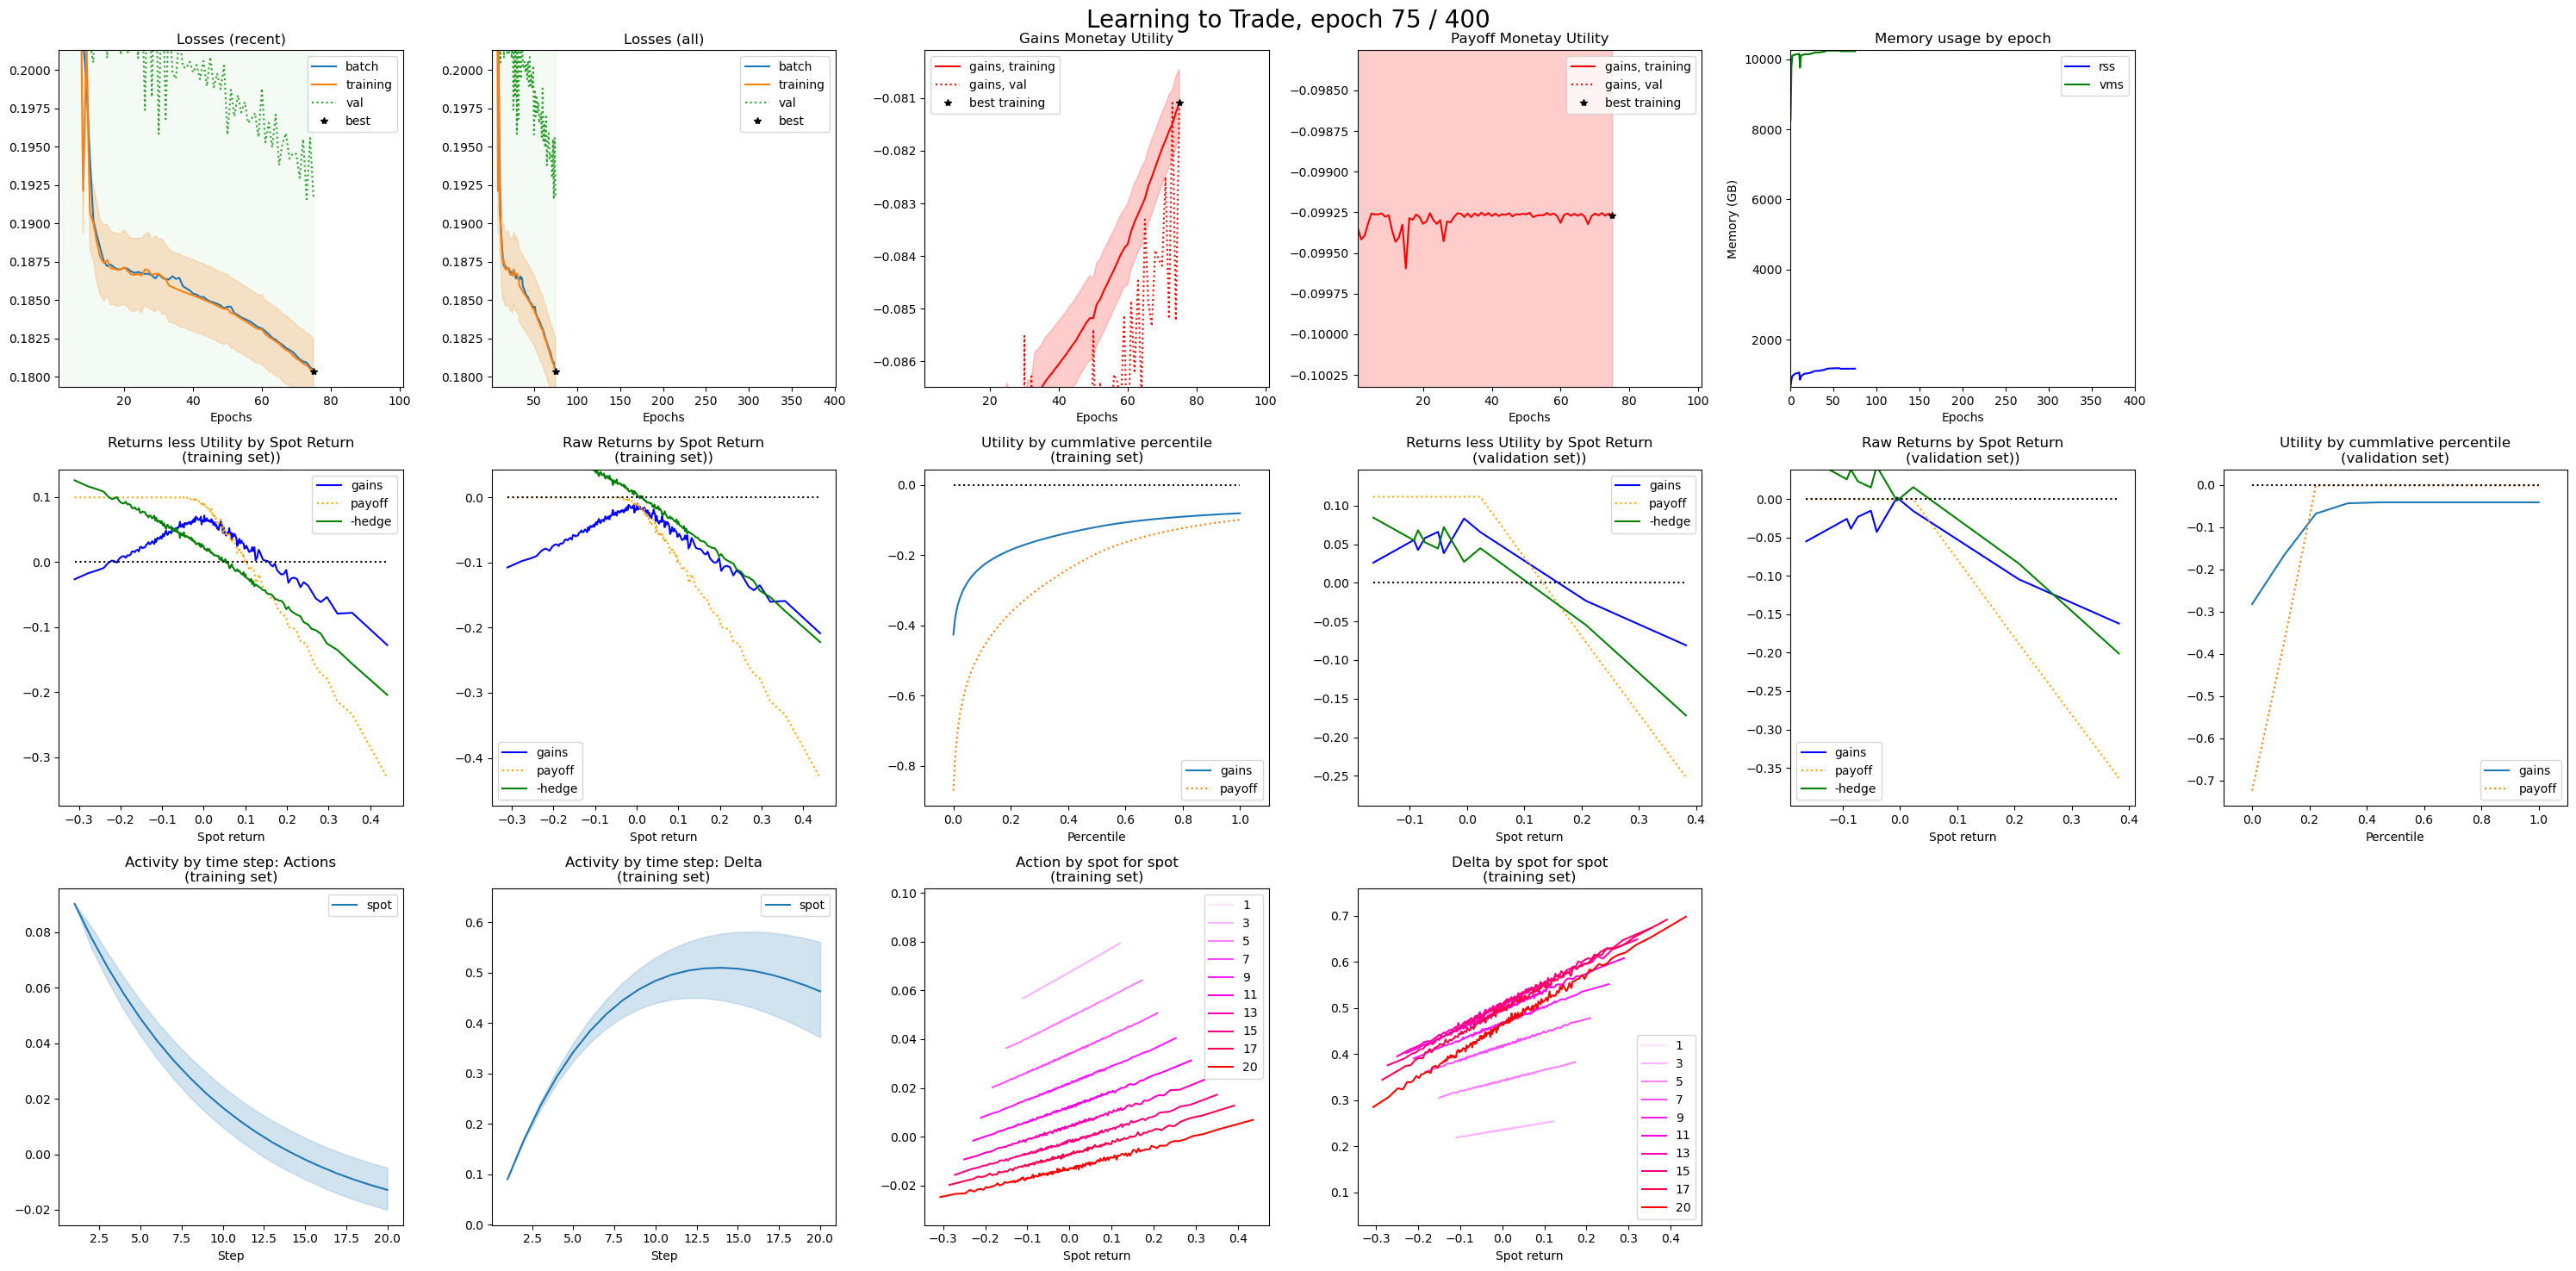

Training 76/400 epochs; 943 weights; 10000 samples; 10 validation samples batch size 2000 | initial loss 0.792097 (0.0122872), training 0.180119 (0.00214522), best 0.180119 (0.0122872), batch 0.180288, val 0.193293 (0.0998451). Best epoch 75; last cached 70. | memory used: rss 1177.6M, vms 10226.3M | time elapsed 20s; time per epoch 0s; estimated time remaining 1:46                         

In [ ]:
display(Markdown("## Deep Hedging in a Black \& Scholes World - Big Steps"))

# create world
world  = SimpleWorld_BS( config.world )
val_world  = world.clone(samples=world.nSamples//1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
config.done()

In [ ]:
import deephedging.plot_bs_hedge as plot_bs_hedge
import imp
imp.reload(plot_bs_hedge)

plot_bs_hedge.plot_blackscholes( world, gym, config )

In [ ]:
display(Markdown("## Deep Hedging in a Black \& Scholes World - Small Steps"))

config_small_dt.trainer.caching.mode = "update"

# create world
world  = SimpleWorld_BS( config_small_dt.world )
val_world  = world.clone(samples=world.nSamples//10)

# create training environment
gym = VanillaDeepHedgingGym( config_small_dt.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config_small_dt.trainer )
config_small_dt.done()

In [ ]:
import deephedging.plot_bs_hedge as plot_bs_hedge
import imp
imp.reload(plot_bs_hedge)

plot_bs_hedge.plot_blackscholes( world, gym, config )